In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import time

import seaborn
from matplotlib import pyplot

from sklearn.linear_model import LogisticRegression

In [2]:
import duckdb, sqlalchemy
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

# Project Title

Did the Rise of Netflix Kill the Success of Movie Theaters?


# Research Questions

(1) What effect does the price of Netflix stocks have on worldwide box office revenue from 2002 to 2020?

(2) What effect does the price of Netflix stocks have on domestic box office revenue from 2002 to 2020?

(3) How has the price of the S&P 500 index affected domestic box office revenue from 2002 to 2020, diving into the potential effects of the overall economy on the trends of box office revenue?

# Data Collection and Cleaning

We found three datasets for our project, with each showing the following: Netflix stock prices from 2002-2021, box office revenue (worldwide, domestic, and international) from 1940-2020 of the Top 600 well-performing movies, and S&P 500 index prices from 1927-2020. These datasets were selected because they included data (collectively) from around the time range we were looking for (early 2000’s to around current day), and because they all had extensive data on the changing prices of the respective stocks/indexes and box office revenue, as needed to properly analyze our research questions. Regarding these three raw data files, below includes a documentation of all the steps we took to turn those files into the analysis-ready datasets needed for our final project.

Below is the raw data for netflix.csv, which shows Netflix stock prices from 2002 to 2021.

In [3]:
netflix_df = pd.read_csv("netflix.csv")
netflix_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


The above dataset was read and altered using pandas to convert data from “Date” column to be converted to the date type (using pandas.to_datetime) so the date data can be easily manipulated in the feature. We then created “Year” and “Month” columns to contain the respective year and month data from this new date data. “netflix_2002to2020_df” cleans the dataset by only showing data from prior to 2021 as our analyses only required data from 2002 to 2020 given the restrictions of our other datasets. We chose to only display “Date”, “Close” (price of stock when the stock market closed for that specific day), and “Year” by selecting those three columns out of the original seven columns (Date, Open, High, Low, Close, Adj Close, and Volume) using the SQL SELECT function for our final cleaned dataset for this information (“clean_netflix_df”), as shown below.

In [4]:
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'])
netflix_df['Year'] = netflix_df['Date'].dt.year
netflix_df['Month'] = netflix_df['Date'].dt.month

netflix_2002to2020_df = netflix_df[(netflix_df['Year']<2021)]
netflix_2002to2020_df

%sql clean_netflix_df << SELECT Date AS netDate, Close AS netClose, Year AS netYear FROM netflix_2002to2020_df

clean_netflix_df

Returning data to local variable clean_netflix_df


,netDate,netClose,netYear
0,2002-05-23,1.196429,2002
1,2002-05-24,1.210000,2002
2,2002-05-28,1.157143,2002
3,2002-05-29,1.103571,2002
4,2002-05-30,1.071429,2002
...,...,...,...
4681,2020-12-24,513.969971,2020
4682,2020-12-28,519.119995,2020
4683,2020-12-29,530.869995,2020
4684,2020-12-30,524.590027,2020


Below is the raw data for worldwideboxoffice.csv, which shows box office revenue from 1940 to 2020.

In [5]:
boxoffice_df = pd.read_csv("worldwideboxoffice.csv")
boxoffice_df

,Rank,Year,Movie,WorldwideBox Office,DomesticBox Office,InternationalBox Office
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916"
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601"
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592"
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041"
...,...,...,...,...,...,...
590,596,2010,Knight and Day,"$258,751,370","$76,423,035","$182,328,335"
591,597,1985,Out of Africa,"$258,210,860","$79,096,868","$179,113,992"
592,598,2011,Super 8,"$257,972,745","$127,004,179","$130,968,566"
593,599,2013,American Hustle,"$257,858,943","$150,098,456","$107,760,487"


In [6]:
boxoffice_df.head(10)

,Rank,Year,Movie,WorldwideBox Office,DomesticBox Office,InternationalBox Office
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916"
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601"
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592"
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041"
5,6,2015,Jurassic World,"$1,669,979,967","$652,306,625","$1,017,673,342"
6,7,2019,The Lion King,"$1,654,367,425","$543,638,043","$1,110,729,382"
7,8,2015,Furious 7,"$1,516,881,526","$353,007,020","$1,163,874,506"
8,9,2012,The Avengers,"$1,515,100,211","$623,357,910","$891,742,301"
9,10,2019,Frozen II,"$1,446,925,396","$477,373,578","$969,551,818"


For the above dataset, we used pandas to only show information from after the year 2001 (starting from 2002) as that was the time range we’ll be examining for our analyses and used the SQL SELECT function to only select the “Rank”, “Year”, “WorldwideBox Office” and “DomesticBox Office” columns’ data, as shown below. This is because we were not planning on looking at any relations pertaining to the “InternationalBox Office” column as it was not applicable to our research questions. The dataset also included box office revenue as strings with "$" in the front, so we manually set the "$" to an empty string "" and also changed the data type of these values to be floats from strings.

In [14]:
from2002_to2020_boxofficehit_df = boxoffice_df[(boxoffice_df['Year']>2001)]
from2002_to2020_boxofficehit_df = from2002_to2020_boxofficehit_df[(boxoffice_df['Year']<2021)]

%sql clean_box_df << SELECT Rank, Year AS boxYear, "WorldwideBox Office", "DomesticBox Office" FROM from2002_to2020_boxofficehit_df 

clean_box_df['WorldwideBox Office'] = clean_box_df['WorldwideBox Office'].str.replace(',', '')
clean_box_df['WorldwideBox Office'] = clean_box_df['WorldwideBox Office'].str.replace('$', '').astype(float)
clean_box_df['DomesticBox Office'] = clean_box_df['DomesticBox Office'].str.replace(',', '')
clean_box_df['DomesticBox Office'] = clean_box_df['DomesticBox Office'].str.replace('$', '').astype(float)

clean_box_df

Returning data to local variable clean_box_df


/var/folders/4s/8m7ssht135535p0jljzkdvvm0000gn/T/ipykernel_40920/3121550739.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from2002_to2020_boxofficehit_df = from2002_to2020_boxofficehit_df[(boxoffice_df['Year']<2021)]
/var/folders/4s/8m7ssht135535p0jljzkdvvm0000gn/T/ipykernel_40920/3121550739.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_box_df['WorldwideBox Office'] = clean_box_df['WorldwideBox Office'].str.replace('$', '').astype(float)
/var/folders/4s/8m7ssht135535p0jljzkdvvm0000gn/T/ipykernel_40920/3121550739.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_box_df['DomesticBox Office'] = clean_box_df['DomesticBox O

,Rank,boxYear,WorldwideBox Office,DomesticBox Office
0,1,2009,2.845900e+09,760507625.0
1,2,2019,2.797801e+09,858373000.0
2,4,2015,2.064616e+09,936662225.0
3,5,2018,2.044541e+09,678815482.0
4,6,2015,1.669980e+09,652306625.0
...,...,...,...,...
443,593,2013,2.600021e+08,89302115.0
444,595,2017,2.592390e+08,92054159.0
445,596,2010,2.587514e+08,76423035.0
446,598,2011,2.579727e+08,127004179.0


In [8]:
%sql clean_box_df << SELECT Year, "WorldwideBox Office", "DomesticBox Office" FROM from2002_to2020_boxofficehit_df 
clean_box_df

Returning data to local variable clean_box_df


,Year,WorldwideBox Office,DomesticBox Office
0,2009,"$2,845,899,541","$760,507,625"
1,2019,"$2,797,800,564","$858,373,000"
2,2015,"$2,064,615,817","$936,662,225"
3,2018,"$2,044,540,523","$678,815,482"
4,2015,"$1,669,979,967","$652,306,625"
...,...,...,...
443,2013,"$260,002,115","$89,302,115"
444,2017,"$259,238,971","$92,054,159"
445,2010,"$258,751,370","$76,423,035"
446,2011,"$257,972,745","$127,004,179"


Below is the raw data for sp500.csv, which shows S&P 500 index price data from 1927 to 2020.

In [9]:
sp_500_df = pd.read_csv("sp500.csv")
sp_500_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000


For the above dataset, we used the pandas to_datetime method to convert data from the “Date” column to the date type for easier future manipulation of this data. We assigned new “Year” and “Month” columns for the respective year and month data, then used pandas to only show data from after the year 2001 (starting from 2002) as that fits the time interval we will examine for our analyses. We then cleaned our dataset using the SQL SELECT function to only select “Date”, “Close” and “Year” in the cleaned dataset as these are the only values we will be observing, as shown below. We chose to select “Close” (which is how much the S&P 500 index price was at the close of that specific stock market day’s closing) among “Open”, “High”, and “Low” as we believe it is relatively representative of the overall performance of the index price for any given day.

In [10]:
sp_500_df['Date'] = pd.to_datetime(sp_500_df['Date'])
sp_500_df['Year'] = sp_500_df['Date'].dt.year
sp_500_df['Month'] = sp_500_df['Date'].dt.month

sp_500_2002to2020_df = sp_500_df[(sp_500_df['Year']>2001)]
sp_500_2002to2020_df
%sql clean_sp500_df << SELECT Date AS spDate, Close AS spClose, Year AS spYear FROM sp_500_2002to2020_df

clean_sp500_df

Returning data to local variable clean_sp500_df


,spDate,spClose,spYear
0,2002-01-02,1154.670044,2002
1,2002-01-03,1165.270020,2002
2,2002-01-04,1172.510010,2002
3,2002-01-07,1164.890015,2002
4,2002-01-08,1160.709961,2002
...,...,...,...
4740,2020-10-29,3310.110107,2020
4741,2020-10-30,3269.959961,2020
4742,2020-11-02,3310.239990,2020
4743,2020-11-03,3369.159912,2020


# Data Description:

**Netflix Daily Stock Prices:** The dataset we selected is about Netflix’s daily stock prices from 2002 to 2021. The columns of the dataset include the date, low, high, open, close, volume, and adj close for the Netflix stocks. While date, high, low are self explanatory, the open column is  the starting period of trading on a securities exchange or organized over-the-counter market, the close is the last price at which a stock trades during a regular trading session. The volume is an indicator of market strength, as rising markets on increasing volume are typically, and the adj closing price amends a stock's closing price to reflect that stock's value after accounting for any. There are 4,881 instances in total, and we decided to focus on one column of the data, which is the close price of the stocks and used data from 2002 to 2020, which is 4,686 instances, because the other dataset we are using has data until 2020. The data most likely contains all instances and is not a sample, but there may be some missing instances in the middle. All the data is directly related to Netflix’s stocks and is self-contained. There is no confidential or offensive information in this data as it does not pertain to a specific subgroup and the individual instances are not people but are prices. Past uses of the data include predicting future stock prices of Netflix and mostly using it for research about economics, stock markets, and finance. 

**Box Office Revenue:** The data shows international, domestic, worldwide box office revenue for the top 600 movies of all time. (Note: Box office revenue doesn’t include DVD sales or streaming.) The columns include the title of the movies, the release year, and the international, domestic, and worldwide box office revenues. The domestic box office revenue will be US revenue, international would be revenue from countries outside of the US, and worldwide would be the total revenue globally. There are 600 instances in total as the dataset collects data about the top 600 movies with the highest revenue from 1940-2020. The data is not a random sample, but is a sample of the top 600 movies, and is comprehensive without missing data but it does not contain data about movies with lower revenue than those in the top-performing list of 600. We decided to focus on data instances from 2002 to 2020, which would be 454 instances, because the Netflix dataset starts from 2002 and our S&P 500 dataset collected data until 2020. All the data is directly related to the box office revenue and is self-contained. There is no confidential or offensive information in this data as it does not pertain to a specific subgroup and the individual instances are not people but are revenues. Past uses of the data include ranking popular movies all time and researching the growth of the movie industry, Hollywood, or blockbuster movies. 

**S&P 500:** The S&P 500 data is a stock market index tracking the stock performance of 500 large companies listed on stock exchanges in the United States. We decided to use this data in order to verify if the changes in box office revenue prices were actually affected/caused by the Netflix stock prices or if they were just showing a correlation. The columns of this dataset include the Date, Open, High, Low, Close, Adj Close, and Volume like the Netflix dataset. We decided to use the data from 2002 to 2020 only, and that would be 4,745 instances out of 23,324. The data most likely contains all instances and is not a sample, but there may be some missing instances in the middle. All the data is directly related to the stock market prices of the top 500 companies in the US and is self-contained. There is no confidential or offensive information in this data as it does not pertain to a specific subgroup and the individual instances are not people but are prices. Like the Netflix dataset, past uses of the data include predicting future stock prices and economic trends of the United States, and research in areas such as business, economics, stock markets, government, and finance.


# Data Limitations

One limitation of our data is that we chose to examine correlations between worldwide and domestic box office and Netflix stock prices in an effort to analyze the effect of streaming services on box office success, but not every country uses Netflix as a primary streaming service. While Netflix is the largest streaming company in the world (~225 million subscribers worldwide), there are a number of other prominent streaming services that will not have been accounted for, such as HBO, Hulu, and Disney+. Thus, only accounting for Netflix in our data, while likely representing the overall impact of streaming services on box office successes in the general sense, may not entirely properly represent the impact of streaming services as a whole. Moreover, our first two research questions observe data from the Netflix stock price and box office revenue datasets without accounting for inflation as due to it, stock prices would see a general increase over the years. However, in order to account for this and deeper dive into the effect of the overall economy on box office revenue and the overall status of movie theaters’ success, our third research question attempts to explore this exact relationship so that our readers will ideally have more accurate context of the economic status of the U.S. so that they can better understand the data analyzed for our second research question. Furthermore, our box office revenue dataset only lists out data for the top 600 best-performing films from 1950 to 2020 and thus doesn’t include data for all films in this time period, meaning this dataset doesn’t contain collective box office revenue for all films and therefore isn’t perfectly representative of the entire movie theater or box office revenue. Furthermore, given that stock prices were recorded by day whereas box office revenue was accumulated for each movie per their release year, we will have to aggregate the data to match one another for any meaningful analysis.

# Exploratory Data Analysis

**(1) Comparing Netflix stock price and worldwide box office revenue**

<AxesSubplot:xlabel='netYear', ylabel='netClose'>

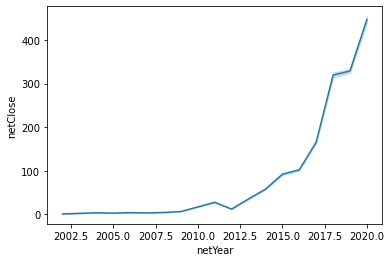

In [11]:
seaborn.lineplot(data = clean_netflix_df, x = "netYear", y = "netClose")

The graph above is a line plot displaying the data from netYear and netClose for the cleaned Netflix stock price dataset. As the years go on from 2002 to 2020, there is a clear and arguably exponential increase in the price of Netflix's stocks, which is representative of an overall boom in the success of streaming services, with Netflix being at the forefront of the success of the online streaming services industry. A significant increase can be noticed from 2017 to 2020 especially, which may be interesting to dive deeper in future data analysis.

In [53]:
print('Mean: ', clean_netflix_df['netClose'].mean())
print('Median: ', clean_netflix_df['netClose'].median())
print('Variance: ', clean_netflix_df['netClose'].var())
print('Correlation: ', clean_netflix_df.corr(method ='pearson'))

Mean:  87.59329485889434
Median:  16.604999542236328
Variance:  17679.59909670735
Correlation:            netClose   netYear
netClose  1.000000  0.795497
netYear   0.795497  1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '2002'),
  Text(1, 0, '2003'),
  Text(2, 0, '2004'),
  Text(3, 0, '2005'),
  Text(4, 0, '2006'),
  Text(5, 0, '2007'),
  Text(6, 0, '2008'),
  Text(7, 0, '2009'),
  Text(8, 0, '2010'),
  Text(9, 0, '2011'),
  Text(10, 0, '2012'),
  Text(11, 0, '2013'),
  Text(12, 0, '2014'),
  Text(13, 0, '2015'),
  Text(14, 0, '2016'),
  Text(15, 0, '2017'),
  Text(16, 0, '2018'),
  Text(17, 0, '2019'),
  Text(18, 0, '2020')])

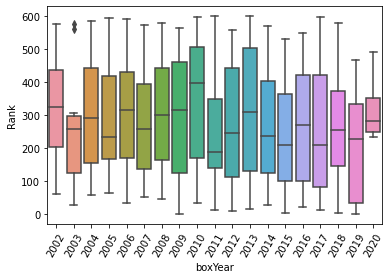

In [15]:
seaborn.boxplot(data = clean_box_df, x = "boxYear", y = "Rank")
plt.xticks(rotation = 60)

<AxesSubplot:xlabel='boxYear', ylabel='Rank'>

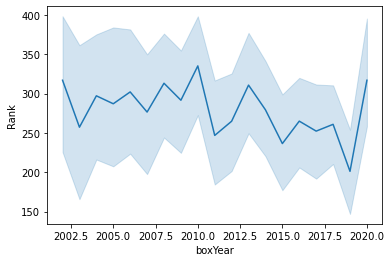

In [16]:
seaborn.lineplot(data = clean_box_df, x = "boxYear", y = "Rank")

The line plot above displays the data of worldwide box office ranks over the dependent variable of the year, indicated as "boxYear". We decided to plot the data using rankings (which are the # ranks of box office hits and are very clearly directly related to the revenue and thereby overall success of that film in movie theaters) as they are a reliable representative of how the box office is doing overall, as explained briefly in the data description above and in parenthesis here. The above line plot is considerably more "zig-zag"-like than the previous line plot plotting Netflix stock prices over time, but there is an overall decrease in the ranks as time goes on. This may be indicative of box offices doing more poorly over the years as the popularity of streaming services, particularly Netflix, go up. Moreover, there is a significant dip in the plot from 207 to 2020, which may be interesting to explore further in the future.

In [52]:
print('Mean: ', clean_box_df["WorldwideBox Office"].mean())
print('Median: ', clean_box_df["WorldwideBox Office"].median())
print('Standard Deviation: ', clean_box_df["WorldwideBox Office"].std())
print('Variance: ', clean_box_df["WorldwideBox Office"].var())
print('Correlation: ', clean_box_df.corr(method ='pearson'))

Mean:  561528884.2008928
Median:  449584092.0
Standard Deviation:  330170227.0685611
Variance:  1.0901237884250518e+17
Correlation:                          Rank   boxYear  WorldwideBox Office  \
Rank                 1.00000 -0.110260            -0.806980   
boxYear             -0.11026  1.000000             0.139588   
WorldwideBox Office -0.80698  0.139588             1.000000   
DomesticBox Office  -0.68176 -0.017494             0.852253   

                     DomesticBox Office  
Rank                          -0.681760  
boxYear                       -0.017494  
WorldwideBox Office            0.852253  
DomesticBox Office             1.000000  


The mean of the worldwide box office revenue is 561,528,884.20 dollars while the median is 449,584,092.00 dollars, which is indicative of just how large the range is for this dataset. Furthermore, the standard deviation stands at 330,170,227.07 dollars while the variance is 1.0901237884250518e+17.

In [31]:
%sql clean_box_avgrank_df << SELECT AVG(Rank) AS avgrank, boxYear FROM clean_box_df GROUP BY boxYear ORDER BY boxYear

Returning data to local variable clean_box_avgrank_df


In [32]:
%sql clean_netflix_avgclose_df << SELECT AVG(netClose) AS avgclose, netYear FROM clean_netflix_df GROUP BY netYear ORDER BY netYear
clean_netflix_avgclose_df

Returning data to local variable clean_netflix_avgclose_df


,avgclose,netYear
0,0.850172,2002
1,2.081205,2003
2,3.413430,2004
3,2.597262,2005
4,3.690996,2006
5,3.123933,2007
6,4.094670,2008
7,6.322035,2009
8,16.824172,2010
9,27.493719,2011


In [33]:
clean_box_avgrank_df

,avgrank,boxYear
0,317.000000,2002
1,257.272727,2003
2,297.187500,2004
3,287.071429,2005
4,302.133333,2006
5,276.526316,2007
6,313.181818,2008
7,291.583333,2009
8,335.241379,2010
9,246.818182,2011


In [34]:
boxrank_netflixclose_df = pd.concat([clean_box_avgrank_df, clean_netflix_avgclose_df], axis=1, join='inner')
display(boxrank_netflixclose_df)

,avgrank,boxYear,avgclose,netYear
0,317.000000,2002,0.850172,2002
1,257.272727,2003,2.081205,2003
2,297.187500,2004,3.413430,2004
3,287.071429,2005,2.597262,2005
4,302.133333,2006,3.690996,2006
5,276.526316,2007,3.123933,2007
6,313.181818,2008,4.094670,2008
7,291.583333,2009,6.322035,2009
8,335.241379,2010,16.824172,2010
9,246.818182,2011,27.493719,2011


Text(0.5, 1.0, 'Average Netflix Stock Prices v. Average Domestic Box Office Revenue (Ranking)')

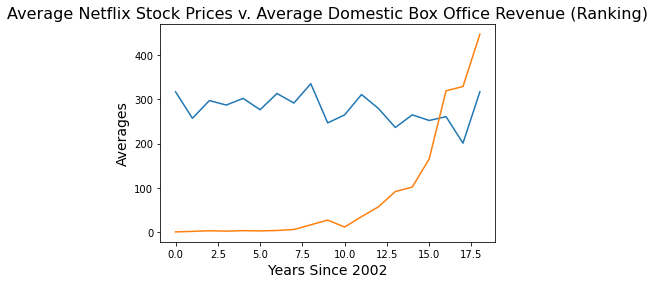

In [68]:
plt.plot(boxrank_netflixclose_df['avgrank'])
plt.plot(boxrank_netflixclose_df['avgclose'])
plt.ylabel('Averages', fontsize=14)
plt.xlabel('Years Since 2002', fontsize=14)
plt.title('Average Netflix Stock Prices v. Average Domestic Box Office Revenue (Ranking)', fontsize=16)

**Key:**
Blue = Average Box Domestic Office Ranking, Orange = Average Netflix Stock Prices

As shown in the multi-line plot above, as the year increases, the average Netflix stock price per year sees an exponential increase starting around 2012. Since the values for the revenue were too large, we decided to use the average ranking of the movies in each year. Lower values in average ranking would represent higher revenue or success. We suggest that due to the popularity of Netflix, only block-bluster movies were the ones who tended to succeed at the box office, whereas more niche-genre movies did not do nearly as well and there have been modern trends of such movies moving to Netflix and other streaming sites for easier accessibility. 

**(2) Comparing S&P 500 index price and Netflix stock price**

<AxesSubplot:xlabel='spYear', ylabel='spClose'>

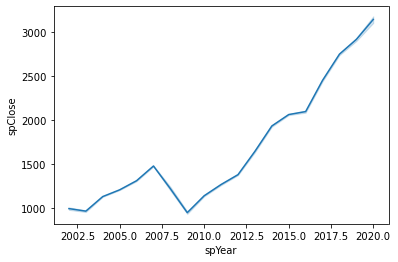

In [17]:
seaborn.lineplot(data = clean_sp500_df, x = "spYear", y = "spClose")

<AxesSubplot:xlabel='netYear', ylabel='netClose'>

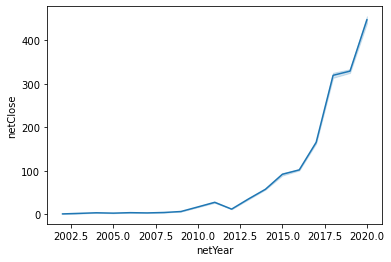

In [71]:
seaborn.lineplot(data = clean_netflix_df, x = "netYear", y = "netClose")

The first graph shows the trend for the S&P 500 close prices, which is a steep increase with a crash in the middle. The second graph shows the trend for the close prices of Netflix stocks in the same time frame,  and is close to an exponential increase in that time. While the price value or the indexes on the y axis are different, they both have a positive slope, suggesting that the growth of Netflix and its stock prices might have been influenced by the US economy and the S&P index.

In [54]:
print('Mean: ', clean_sp500_df["spClose"].mean())
print('Median: ', clean_sp500_df["spClose"].median())
print('Standard Deviation: ', clean_sp500_df["spClose"].std())
print('Variance: ', clean_sp500_df["spClose"].var())
print('Correlation: ', clean_sp500_df.corr(method ='pearson'))

Mean:  1673.3444334994747
Median:  1398.939941
Standard Deviation:  677.5979215293568
Variance:  459138.9432609043
Correlation:            spClose    spYear
spClose  1.000000  0.888194
spYear   0.888194  1.000000


In [24]:
%sql sp_netflix_df << SELECT spDate, netDate, spClose, netClose FROM clean_netflix_df INNER JOIN clean_sp500_df ON clean_netflix_df.netDate = clean_sp500_df.spDate GROUP BY spDate, netDate, netClose, spClose ORDER BY spDate ASC
sp_netflix_df

Returning data to local variable sp_netflix_df


,spDate,netDate,spClose,netClose
0,2002-05-23,2002-05-23,1097.079956,1.196429
1,2002-05-24,2002-05-24,1083.819946,1.210000
2,2002-05-28,2002-05-28,1074.550049,1.157143
3,2002-05-29,2002-05-29,1067.660034,1.103571
4,2002-05-30,2002-05-30,1064.660034,1.071429
...,...,...,...,...
4642,2020-10-29,2020-10-29,3310.110107,504.209991
4643,2020-10-30,2020-10-30,3269.959961,475.739990
4644,2020-11-02,2020-11-02,3310.239990,484.119995
4645,2020-11-03,2020-11-03,3369.159912,487.220001


Text(0.5, 1.0, 'Netflix Stock Prices v. S&P 500 Stock Prices')

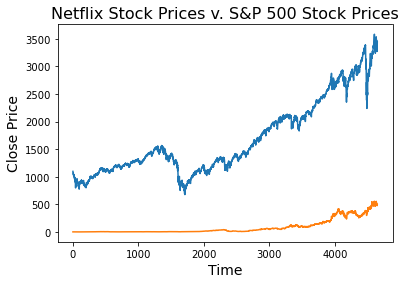

In [67]:
plt.plot(sp_netflix_df['spClose'])
plt.plot(sp_netflix_df['netClose'])
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Netflix Stock Prices v. S&P 500 Stock Prices', fontsize=16)

**Key:** Blue = S&P 500 Stock Prices, Orange = Netflix Stock Prices

The multi-line plot above displays x-axis of the graphs would be “Time” and the y-axis of the graph would be the “Close Price” for both Netflix and S&P 500 index stocks. The Netflix stock prices follow the general trend of the S&P 500, which makes logical sense gicen that the S&P 500 stock prices are relatively representative of the condition and overall status of the U.S. economy, and Netflix stock prices would generally correlate with this representation. Moreover, sicne 2010, Netflix became a part of the S&P 500 list and the company's success and status are accounted for in this data. In this way, there is an observable positive correlation between Netflix stock prices and S&P 500 stock prices over the time frame of 2002 to 2020.

**(3) Comparing S&P 500 index price and domestic box office revenue**

<AxesSubplot:xlabel='boxYear', ylabel='DomesticBox Office'>

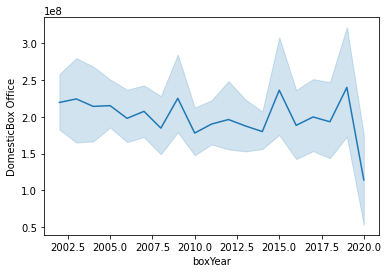

In [73]:
seaborn.lineplot(data = clean_box_df, x = "boxYear", y = "DomesticBox Office")

The line plot above displays the trend of domestic box office revenue over time, with the x-axis being the year and the y-axis being domestic box office revenue. This plot is also relatively "zig-zag"-like, but there is a significant observable sharp decrease in box office revenue from approximately 2018 to 2020, which reflects a similar pattern shown in the previously shown worldwide box office revenue over time line plot and is likely due to an increase in popularity of streaming services. Overall, there is a relatively downwards trend for this line plot, similar to the aforementioned worldwide box office revenue one.

In [55]:
print('Mean: ', clean_box_df["DomesticBox Office"].mean())
print('Median: ', clean_box_df["DomesticBox Office"].median())
print('Standard Deviation: ', clean_box_df["DomesticBox Office"].std())
print('Variance: ', clean_box_df["DomesticBox Office"].var())
print('Correlation: ', clean_box_df.corr(method ='pearson'))

Mean:  201083037.96388263
Median:  171016727.0
Standard Deviation:  127843540.95973402
Variance:  1.6343970965123192e+16
Correlation:                          Rank   boxYear  WorldwideBox Office  \
Rank                 1.00000 -0.110260            -0.806980   
boxYear             -0.11026  1.000000             0.139588   
WorldwideBox Office -0.80698  0.139588             1.000000   
DomesticBox Office  -0.68176 -0.017494             0.852253   

                     DomesticBox Office  
Rank                          -0.681760  
boxYear                       -0.017494  
WorldwideBox Office            0.852253  
DomesticBox Office             1.000000  


In [38]:
%sql spClose_avg_byYear_df << SELECT AVG(spClose) AS spavgclose, spYear FROM clean_sp500_df GROUP BY spYear
spClose_avg_byYear_df

Returning data to local variable spClose_avg_byYear_df


,spavgclose,spYear
0,993.934804,2002
1,965.227540,2003
2,1130.649445,2004
3,1207.229443,2005
4,1310.461236,2006
5,1477.184342,2007
6,1220.042056,2008
7,948.046388,2009
8,1139.965512,2010
9,1267.638809,2011


In [39]:
%sql box_dome_avg_byYear_df << SELECT AVG("DomesticBox Office") AS avg_Dome_box, boxYear FROM clean_box_df GROUP BY boxYear ORDER BY boxYear ASC
box_dome_avg_byYear_df

Returning data to local variable box_dome_avg_byYear_df


,avg_Dome_box,boxYear
0,2.194655e+08,2002
1,2.242691e+08,2003
2,2.141068e+08,2004
3,2.151117e+08,2005
4,1.978476e+08,2006
5,2.073478e+08,2007
6,1.845453e+08,2008
7,2.251061e+08,2009
8,1.778389e+08,2010
9,1.900960e+08,2011


In [41]:
print("Domestic Average Minimum =", box_dome_avg_byYear_df["avg_Dome_box"].min())
print("S&P 500 Close Average Minimum =", spClose_avg_byYear_df["spavgclose"].min())

Domestic Average Minimum = 114028331.25
S&P 500 Close Average Minimum = 948.0463879166666


In [42]:
box_dome_avg_byYear_df['avg_Dome_box'] = (box_dome_avg_byYear_df["avg_Dome_box"] / 114028331.25).round(2)
spClose_avg_byYear_df['spavgclose'] = (spClose_avg_byYear_df["spavgclose"] / 948.04).round(2)
%sql sp_box_df << SELECT spYear, boxYear, avg_Dome_box, spavgclose FROM box_dome_avg_byYear_df INNER JOIN spClose_avg_byYear_df ON box_dome_avg_byYear_df.boxYear = spClose_avg_byYear_df.spYear GROUP BY spYear, boxYear, avg_Dome_box, spavgclose ORDER BY spYear ASC
sp_box_df

Returning data to local variable sp_box_df


,spYear,boxYear,avg_Dome_box,spavgclose
0,2002,2002,1.92,1.05
1,2003,2003,1.97,1.02
2,2004,2004,1.88,1.19
3,2005,2005,1.89,1.27
4,2006,2006,1.74,1.38
5,2007,2007,1.82,1.56
6,2008,2008,1.62,1.29
7,2009,2009,1.97,1.00
8,2010,2010,1.56,1.20
9,2011,2011,1.67,1.34


Text(0.5, 1.0, 'Average Domestic Box Office Revenue v. Average S&P 500 Close Stock Prices')

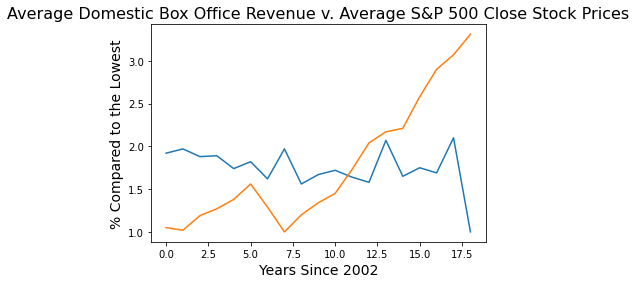

In [69]:
plt.plot(box_dome_avg_byYear_df['avg_Dome_box'])
plt.plot(spClose_avg_byYear_df['spavgclose'])
plt.ylabel('% Compared to the Lowest', fontsize=14)
plt.xlabel('Years Since 2002', fontsize=14)
plt.title('Average Domestic Box Office Revenue v. Average S&P 500 Close Stock Prices', fontsize=16)

**Key:**
Blue = Average Domestic Box Office Ranking, Orange = Average S&P 500 Close Stock Prices

The graph above compares the average domestic box office revenue with the average S&P 500 close stock prices, and shows the change in prices over time as the percentage of each minimum average. The average s&p is the steeply rising orange line and the average domestic box office revenue is represented by the blue line, which fluctuates but has a general negative trend that falls steeply in the end probably due to COVID. Due to the trends of each graph, it suggests that the US economy has little correlation with the domestic box office revenue.

# Questions for Reviewers

(1) How can we improve on the complexity and clarity of our research questions?

(2) Suggestions on other kinds of data visualizations we can explore for our data analysis? How can we make the graphs less complex to understand for readers and simplify them for easier digestability?

(3) How on-track are our analyses of the analyzed trends? What type of information or analysis should we try to include for future phases to make our written analysis more thorough?

(4) What are some other clear limitations of our datasets aside from the ones already listed?